# Clasificación de Género Clasical Aproach

### Josep Monclús Carrasco

In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("tutors.csv")
dataset = dataset[dataset["comentarios"].notna()]

In [ ]:
# We remove coments with less than 50 character lenght
dataset = dataset[dataset["comentarios"].str.len() > 50]
dataset

In [125]:
genderized_words = {
    "profesor":"profesorx","profesora":"profesorx",
    "professor":"profesorx","professora":"profesorx",
    "maestro":"maestrx","maestra":"maestrx",
    "licenciado":"licenciadx","licenciada":"licenciadx",
    "simpatica":"simpaticx","simpatico":"simpaticx",
    "educada":"educadx","educado":"educadx",
    "graduada":"graduadx","graduado":"graduadx",
    "especializado":"especializadx","especializada":"especializadx",
    "chico":"chicx","chica":"chicx",
    "biólogo":"biologx","bióloga":"biologx",
    "compositor":"compositorx","compositora":"compositorx",
    "director":"directorx","directora":"directorx",
    "tutor":"tutorx","tutora":"tutorx",
    "diplomado":"diplomadx","diplomada":"diplomadx",
    "traductor":"traductorx","traductora":"traductorx",
    "francesa":"francesx","frances":"francesx",
    "examinador":"examinadorx","examinadora":"examinadorx",
    "haberla":"haberlx","haberlo":"haberlx",
    "músico":"musicx","música":"musicx",
    "musico":"musicx","musica":"musicx",
    "chicas":"chicxs","chicos":"chicxs",
    "hija":"hijx","hijo":"hijx",
    "bailarín":"bailarinx","bailarina":"bailarinx","bailarin":"bailarinx",
    "certificado":"certificadx","certificada":"certificadx",
    "recomendarla":"recomendarlx","recomendarlo":"recomendarlx",
    "primera":"primerx","primero":"primerx",
    "tenerla":"tenerlx","tenerle":"tenerlx","tenerlo":"tenerlx",
    "nativa":"nativx","nativo":"nativx",
    "implicada":"implicadx","implicado":"implicadx",
    "ingeniero":"ingenierx","ingeniera":"ingenierx",
    "entrenador":"entrenadorx","entrenadora":"entrenadorx",
    "titulado":"tituladx","titulada":"tituladx",
    "encantado":"encantadx","encantada":"encantadx",
    "apasionado":"apasionadx","apasionada":"apasionadx",
    "dispuesto":"dispuestx","dispuesta":"dispuestx",
    "comprometida":"comprometidx","comprometido":"comprometidx",
    "estupendo":"estupendx","estupenda":"estupendx",
    "preparado":"preparadx","preparada":"preparadx",
    "buen":"buenx","buena":"buenx","bueno":"buenx",
    "cercano":"cercanx","cercana":"cercanx",
    "didáctico":"didáctix","didáctica":"didáctix",
    "profesores":"profesorxs","profesoras":"profesorxs",
    "amigo":"amigx","amiga":"amigx",
    "tecnico":"tecnicx","tecnica":"tecnicx",
    "majo":"majx","maja":"majx",
    "monitor":"monitorx","monitora":"monitorx",
    "dedicada":"dedicadx","dedicado":"dedicadx",
    "recomendado":"recomendadx","recomendada":"recomendadx",
    "atento":"atentx","atenta":"atentx",
    "simpático":"simpaticx","simpática":"simpaticx",
    "motivadora":"motivadorx","motivador":"motivadorx",
    "trabajador":"trabajadorx","trabajadora":"trabajadorx",
    "encantadora":"encantadorx","encantador":"encantadorx",
    "seria":"serix","serio":"serix",
    "chicos":"chicxs","chicas":"chicxs",
    "preparado":"preparadx","preparada":"preparadx",
    "fantástico":"fantásticx","fantástica":"fantásticx",
    "comprometida":"comprometidx","comprometido":"comprometidx",
    "claro":"clarx","clara":"clarx",
    "sencillo":"sencillx","sencilla":"sencillx",
    "divertido":"divertidx","divertida":"divertidx",
    "magnífico":"magníficx","magnífica":"magníficx",
    "compañero":"compañerx","compañera":"compañerx",
    "dinámico":"dinámicx","dinámica":"dinámicx",
    "comprensivo":"comprensivx","comprensiva":"comprensivx",
    "entregado":"entregadx","entregada":"entregadx",
    "cumplidor":"cumplidorx","cumplidora":"cumplidorx",
    "respetuoso":"respetuosx","respetuosa":"respetuosx",
    "magnifico":"magnificx","magnifica":"magnificx",
    "digno":"dignx","digna":"dignx",
    "organizada":"organizadx","organizado":"organizadx",
    "cariñosa":"cariñosx","cariñoso":"cariñosx",
    "maravillosa":"maravillosx","maravilloso":"maravillosx",
    "empática":"empáticx","empático":"empáticx",
    "tranquilo":"tranquilx","tranquila":"tranquilx",
    "magnífico":"magníficx","magnífica":"magníficx",
    "metódico":"metódicx","metódica":"metódicx",
    "cualificado":"cualificadx","cualificada":"cualificadx",
    "ordenado":"ordenadx","ordenada":"ordenadx",
    "resolutivo":"resolutivx","resolutiva":"resolutivx",
    "aplicada":"aplicadx","aplicado":"aplicadx",
    "práctico":"prácticx","práctica":"prácticx",
    "motivado":"motivadx","motivada":"motivadx",
    "extraordinario":"extraordinarix","extraordinaria":"extraordinarix",
    "capacitado":"capacitadx","capacitada":"capacitadx",
    "adaptado":"adaptadx","adaptada":"adaptadx",
    "niño":"niñx","niña":"niñx",
    "rápido":"rapidx","rápida":"rápidx",
    "técnico":"tecnicx","técnica":"tecnicx",
    "abierto":"abiertx","abierta":"abiertx"
}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
import re
stop = stopwords.words('spanish')
tfidf_vectorizer=TfidfVectorizer(stop_words=stop, max_df=0.7)
#Data cleaning 
dataset["comentarios2"]=dataset["comentarios"].str.lower()
# remove punctuation
dataset['comentarios2'] = dataset['comentarios2'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
# remove one and two character words
dataset['comentarios2'] = dataset['comentarios2'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
# remove numerical values
dataset['comentarios2'] = dataset['comentarios2'].apply(lambda x: re.sub(r'[0-9]+', '', x))
# \s+ means all empty space (\n, \r, \t)
dataset['comentarios2'] = dataset['comentarios2'].apply(lambda x: re.sub('\s+', ' ', x))
# Neutralizar género
dataset['comentarios2'] = dataset['comentarios2'].apply(lambda x: " ".join([word if word not in genderized_words else genderized_words[word] for word in x.split(" ")]))

In [128]:
print("Número de mujeres: ", np.sum(dataset.genero == "female")) 
print("Número de hombres: ", np.sum(dataset.genero == "male")) 

Número de mujeres:  3415
Número de hombres:  3425


HACER EL SPLIT 80/10/10

In [ ]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score,roc_auc_score
import time
t = time.time()
dataset["genero_int"] = dataset.genero
dataset["genero_int"][dataset["genero_int"] == "female"] = 1
dataset["genero_int"][dataset["genero_int"] == "male"] = 0
x_train,x_test,y_train,y_test=train_test_split(dataset['comentarios2'], dataset.genero_int, test_size=0.2, random_state=7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print(time.time() - t)

In [131]:
t = time.time()
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.02, kernel='linear', degree=3, gamma='auto')#,probability=True)
SVM.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(y_test,predictions_SVM)*100)
print("SVM AUCroc -> ",roc_auc_score(y_test,predictions_SVM))
print(time.time() - t)

SVM Accuracy Score ->  78.28947368421053
SVM AUCroc ->  0.7824289427779869
41.22376799583435


In [132]:
coefs = np.sort(SVM.coef_.toarray())
k_words = 20
male_words = coefs[0][0:k_words]
female_words = coefs[0][-k_words:]
pal_male = []
pal_female = []
for i in range(k_words):
    ind_male = SVM.coef_.toarray().tolist()[0].index(male_words[i])
    val_male = male_words[i]
    ind_female = SVM.coef_.toarray().tolist()[0].index(female_words[i])
    val_female = female_words[i]
    for palabra,numero in tfidf_vectorizer.vocabulary_.items():
        if numero == ind_male:
            pal_male.append([palabra,val_male])
        if numero == ind_female:
            pal_female.append([palabra,val_female])

In [133]:
pal_male

[['musicx', -1.947560747061023],
 ['problemas', -1.8931812811666808],
 ['gran', -1.7567458275167576],
 ['interesantes', -1.737393672576076],
 ['educadx', -1.728748025985781],
 ['amigx', -1.675217682925386],
 ['padres', -1.6392152790052534],
 ['recomendadx', -1.6340630664519784],
 ['guitarra', -1.5978852780004345],
 ['sencillx', -1.5840444811566043],
 ['asignaturas', -1.56990987759511],
 ['ingenierx', -1.5691436781531436],
 ['sector', -1.5482550367577468],
 ['matemáticas', -1.545808265328124],
 ['rapidx', -1.5020589639211601],
 ['chicxs', -1.499725571958455],
 ['alguien', -1.4662137407983387],
 ['cumplidorx', -1.438225742611202],
 ['siendo', -1.4235571681874326],
 ['entretiene', -1.410394078231245]]

In [134]:
pal_female

[['super', 1.5075037885936768],
 ['organización', 1.5135950693614537],
 ['pintura', 1.5179988451318196],
 ['sabido', 1.5385646368260248],
 ['superior', 1.570180967638877],
 ['magníficx', 1.5751665717784333],
 ['contenidos', 1.5858746516749596],
 ['dulce', 1.60749801280438],
 ['pasos', 1.617704472217061],
 ['trabajadorx', 1.6180563382009692],
 ['juegos', 1.7468436642019747],
 ['encanto', 1.7660851637138582],
 ['resultados', 1.827583844240986],
 ['maravillosx', 1.8411936933241972],
 ['profesional', 1.952967184279583],
 ['muchísimo', 2.0866569363149856],
 ['agradable', 2.1630701242079087],
 ['cariñosx', 2.453175396927593],
 ['encantadorx', 3.029756790737899],
 ['elle', 3.313341855130364]]

In [22]:
SVM.n_features_in_

36142

## Shifterator Comentarios

In [78]:
def text_preprocessing_updated(text_data,language="es"):
    preprocessed_texts = []
    for text in text_data:
            if "écoute" in text:
                continue
            if "très" in text:
                continue
            #text = text.lower()
            # hashtags -> words, URLs -> URL and mentions -> USER
            text=text.lower()
            # remove punctuation
            text =re.sub('[^\w\s]', ' ', text)
            # remove one and two character words
            text = re.sub(r'\b\w{1,3}\b', '', text)
            # remove numerical values
            text = re.sub(r'[0-9]+', '', text)
            # \s+ means all empty space (\n, \r, \t)
            text = re.sub('\s+', ' ', text)
            # Neutralizar género
            text = " ".join([word if word not in genderized_words else genderized_words[word] for word in text.split(" ")])
            text = re.sub('#', '', text)
            text = re.sub('\n', ' ', text)
            text = re.sub('((www\.[\\s]+)|(https?://[^\\s]+))', 'URL', text)
            text = re.sub('\_', ' ', text) # _
            text = re.sub('\!', ' ', text) # !
            text = re.sub('\?', ' ', text) # ?
            text = re.sub('\W', ' ', text) # symbols
            text = re.sub('\_', ' ', text) # _
            text = re.sub('[\s]+', ' ', text) # spaces
            text = re.sub(r'(\d)\s+(\d)', r'\1\2', text) # remove spaces between numbers
            text = text.replace("í","i").replace("á","a").replace("ó","o").replace("ú","u").replace("é","e")
            text = text.replace("0","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","")
            text_a = [word for word in text.split(" ") if word not in stop]
            text = " ".join(text_a)

            preprocessed_texts.append(text.lower())

    return preprocessed_texts

In [79]:
np.unique(dataset.materia)

array(['Ciencias', 'Deporte', 'Idiomas', 'Musica', 'Repaso'], dtype=object)

In [173]:
#Materia escogida
materia = "Repaso"
dataset_m = dataset[dataset["materia"]==materia]
print(len(dataset_m))
df_male = dataset_m["comentarios"][dataset_m["genero"]=="male"]
print(len(df_male))
male_preprop = text_preprocessing_updated(df_male)
df_female = dataset_m["comentarios"][dataset_m["genero"]=="female"]
print(len(df_female))
female_preprop = text_preprocessing_updated(df_female)

67
26
41


In [174]:
#male_preprop
import shifterator as sh
from nltk.tokenize import word_tokenize
text_m = " ".join(male_preprop).replace("í","i").replace("á","a").replace("ó","o").replace("ú","u").replace("é","e")
text_m = text_m.replace("0","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","")
text_m = text_m.split()
tokens = [word_tokenize(text_m[i]) for i in range(len(text_m))]
flat_list_tokens_m = [item for sublist in tokens for item in sublist]

text_f = " ".join(female_preprop).replace("í","i").replace("á","a").replace("ó","o").replace("ú","u").replace("é","e")
text_f = text_f.replace("0","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","")
text_f = text_f.split()
tokens = [word_tokenize(text_f[i]) for i in range(len(text_f))]
flat_list_tokens_f = [item for sublist in tokens for item in sublist]


In [175]:
from collections import Counter
mst_male = Counter(flat_list_tokens_m).most_common(10000)
mst_female = Counter(flat_list_tokens_f).most_common(10000)
freq_male = dict()
for word in mst_male:
    freq_male[word[0]] = word[1]
    
freq_female = dict()
for word in mst_female:
    freq_female[word[0]] = word[1]

In [176]:
#mst_male

In [177]:
#mst_female

In [178]:
proportion_shift = sh.EntropyShift(type2freq_1=freq_male,
                                      type2freq_2=freq_female,base = 2,alpha = 0.8)
#proportion_shift.get_shift_graph(system_names = ['Profesores', 'Profesoras'],
#                                 title='Proportion Shift of tutors comments')

/Users/josepmoncluscarrasco/opt/anaconda3/lib/python3.7/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


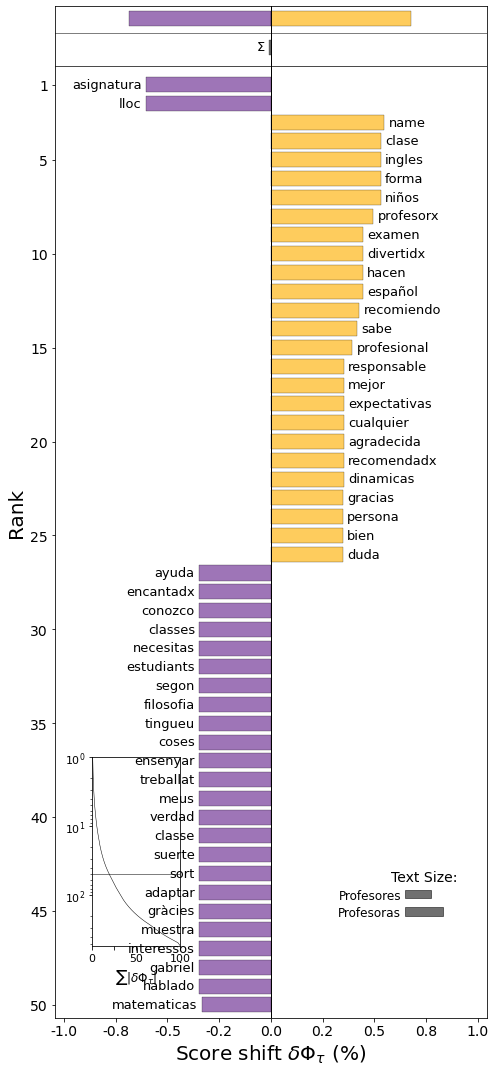

In [179]:
plot = proportion_shift.get_shift_graph(system_names = ['Profesores', 'Profesoras'],
                                 title='')
plot.figure.savefig("Shift_Repaso.jpg",dpi = 200)